<a href="https://www.kaggle.com/code/sedatparlak/rating-and-sorting-udemy-courses?scriptVersionId=109749543" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Rating and Sorting Udemy Courses

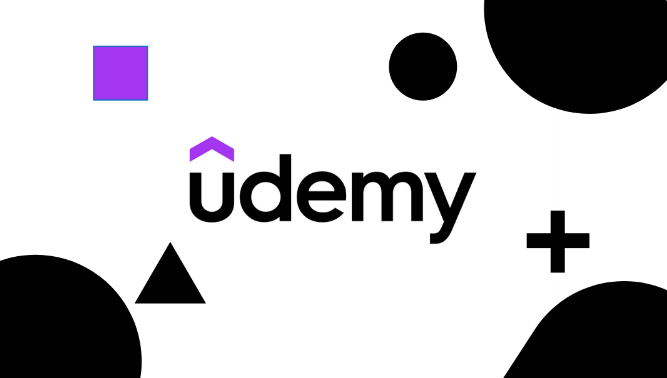

## About Dataset

Context
A compilation of all the BUSINESS related courses ( 10 thousand courses) which are available on Udemy's website. Under the Business category, there are courses from Finance, Entrepreneurship, Communication, Management, Sales, Strategy, Operations, Project Management, Business Law, Data & Analytics, Home Business, Human Resources and Industry each having multiple courses under it's domain.
All the details can be found on Udemy's website as well!

Content
Here, I have extracted data related to 10k courses which come under the development category on Udemy's website.
The 20 columns in the dataset can be used to gain insights related to:

* id : The course ID of that particular course.
* title : Shows the unique names of the courses available under the development category on Udemy.
* url: Gives the URL of the course.
* is_paid : Returns a boolean value displaying true if the course is paid and false if otherwise.
* num_subscribers : Shows the number of people who have subscribed that course.
* avg_rating : Shows the average rating of the course.
* avg rating recent : Reflects the recent changes in the average rating.
* num_reviews : Gives us an idea related to the number of ratings that a course has received.
* num_ published_lectures : Shows the number of lectures the course offers.
* num_ published_ practice_tests : Gives an idea of the number of practice tests that a course offers.
* created : The time of creation of the course.
* published_time : Time of publishing the course.
* discounted_ price_amount : The discounted price which a certain course is being offered at.
* discounted_ price_currency : The currency corresponding to the discounted price which a certain course is being offered at.
* price_ detail_amount : The original price of a particular course.
* price_ detail_currency : The currency corresponding to the price detail amount for a course.

**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000) 
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

**Read csv file**

In [2]:
df = pd.read_csv('/kaggle/input/business-courses-udemy-10k-courses/udemy_output_All_Business_p1_p626.csv')

**First 5 rows**

In [3]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.6602,4.6787,4.6787,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0000,INR,₹455,8640.0000,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.5896,4.6002,4.6002,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0000,INR,₹455,8640.0000,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.5949,4.5933,4.5933,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0000,INR,₹455,8640.0000,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.5441,4.5377,4.5377,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0000,INR,₹455,8640.0000,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.4708,4.4717,4.4717,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0000,INR,₹455,8640.0000,INR,"₹8,640"


**Delete unneccesary columns**

In [4]:
df = df.drop(['url', 'is_paid', 'rating', 'is_wishlisted', 'discount_price__amount', 'discount_price__currency',
       'discount_price__price_string', 'price_detail__amount',
       'price_detail__currency', 'price_detail__price_string', 'created', 'published_time'], axis=1)

In [5]:
df.head()

,id,title,num_subscribers,avg_rating,avg_rating_recent,num_reviews,num_published_lectures,num_published_practice_tests
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,295509,4.6602,4.6787,78006,84,0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,209070,4.5896,4.6002,54581,78,0
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,155282,4.5949,4.5933,52653,292,2
3,648826,The Complete Financial Analyst Course 2020,245860,4.5441,4.5377,46447,338,0
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,374836,4.4708,4.4717,41630,83,0


**Get info**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9447 non-null   int64  
 1   title                         9447 non-null   object 
 2   num_subscribers               9447 non-null   int64  
 3   avg_rating                    9447 non-null   float64
 4   avg_rating_recent             9447 non-null   float64
 5   num_reviews                   9447 non-null   int64  
 6   num_published_lectures        9447 non-null   int64  
 7   num_published_practice_tests  9447 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 590.6+ KB


**Check null values**

In [7]:
df.isnull().sum()

id                              0
title                           0
num_subscribers                 0
avg_rating                      0
avg_rating_recent               0
num_reviews                     0
num_published_lectures          0
num_published_practice_tests    0
dtype: int64

**Check unique values**

In [8]:
df.nunique()

id                              9447
title                           9424
num_subscribers                 4319
avg_rating                      1634
avg_rating_recent               9019
num_reviews                     1176
num_published_lectures           278
num_published_practice_tests       7
dtype: int64

**Describe numeric variables**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,9447.0000,1456603.3777,895660.0941,2762.0000,673031.0000,1381806.0000,2154793.0000,3469452.0000
num_subscribers,9447.0000,3399.2982,10451.5341,3.0000,141.0000,916.0000,2889.5000,374836.0000
avg_rating,9447.0000,4.1385,0.4536,1.0000,3.9000,4.2000,4.4500,5.0000
avg_rating_recent,9447.0000,4.1248,0.4784,1.0000,3.8794,4.2061,4.4475,5.0000
num_reviews,9447.0000,299.0545,1826.8675,3.0000,12.0000,33.0000,110.0000,78006.0000
num_published_lectures,9447.0000,34.4009,46.0611,0.0000,13.0000,23.0000,39.0000,699.0000
num_published_practice_tests,9447.0000,0.1018,0.5800,0.0000,0.0000,0.0000,0.0000,6.0000


## Sort courses by weighted sorting score

**num_subscribers scaled with MinMaxScaler**

In [10]:
df['num_subscribers_scale'] = MinMaxScaler(feature_range=(1, 5)).fit(df[['num_subscribers']]).transform(df[['num_subscribers']])

**num_reviews scaled with MinMaxScaler**

In [11]:
df['num_reviews_scale'] = MinMaxScaler(feature_range=(1, 5)).fit(df[['num_reviews']]).transform(df[['num_reviews']])

In [12]:
df.head(10)

,id,title,num_subscribers,avg_rating,avg_rating_recent,num_reviews,num_published_lectures,num_published_practice_tests,num_subscribers_scale,num_reviews_scale
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,295509,4.6602,4.6787,78006,84,0,4.1535,5.0000
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,209070,4.5896,4.6002,54581,78,0,3.2310,3.7988
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,155282,4.5949,4.5933,52653,292,2,2.6570,3.6999
3,648826,The Complete Financial Analyst Course 2020,245860,4.5441,4.5377,46447,338,0,3.6236,3.3817
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,374836,4.4708,4.4717,41630,83,0,5.0000,3.1346
5,1208634,Microsoft Power BI - A Complete Introduction [...,124180,4.5623,4.5768,38093,275,0,2.3251,2.9533
6,864146,Agile Crash Course: Agile Project Management; ...,96207,4.3238,4.2912,30470,23,0,2.0266,2.5624
7,321410,Beginner to Pro in Excel: Financial Modeling a...,127680,4.5403,4.5335,28665,275,0,2.3625,2.4698
8,673654,Become a Product Manager | Learn the Skills & ...,112572,4.5039,4.5008,27408,144,0,2.2013,2.4053
9,1653432,The Business Intelligence Analyst Course 2020,115269,4.5007,4.4958,23906,413,0,2.2301,2.2257


**Define weighted_sort_score function**

In [13]:
def weighted_sort_score(dataframe, w1=28, w2=26, w3=24, w4=22):
    
    total_score = dataframe['num_subscribers_scale'] * w1 + \
    dataframe['num_reviews_scale'] * w2 + \
    dataframe['avg_rating_recent'] * w3 + \
    dataframe['avg_rating'] * w4
    
    return total_score / 100    

In [14]:
df['weighted_sorting_score'] = weighted_sort_score(df)

**Sort top 15 courses**

In [15]:
df.sort_values('weighted_sorting_score', ascending=False).head(15)

,id,title,num_subscribers,avg_rating,avg_rating_recent,num_reviews,num_published_lectures,num_published_practice_tests,num_subscribers_scale,num_reviews_scale,weighted_sorting_score
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,295509,4.6602,4.6787,78006,84,0,4.1535,5.0000,4.6111
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,374836,4.4708,4.4717,41630,83,0,5.0000,3.1346,4.2718
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,209070,4.5896,4.6002,54581,78,0,3.2310,3.7988,4.0061
3,648826,The Complete Financial Analyst Course 2020,245860,4.5441,4.5377,46447,338,0,3.6236,3.3817,3.9826
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,155282,4.5949,4.5933,52653,292,2,2.6570,3.6999,3.8192
19,980086,Deep Learning Prerequisites: The Numpy Stack i...,239309,4.4738,4.5400,18322,47,0,3.5537,1.9394,3.5731
5,1208634,Microsoft Power BI - A Complete Introduction [...,124180,4.5623,4.5768,38093,275,0,2.3251,2.9533,3.5210
15,1202988,The Complete Financial Analyst Training & Inve...,182002,4.4957,4.4951,21421,225,0,2.9422,2.0983,3.4372
7,321410,Beginner to Pro in Excel: Financial Modeling a...,127680,4.5403,4.5335,28665,275,0,2.3625,2.4698,3.3905
8,673654,Become a Product Manager | Learn the Skills & ...,112572,4.5039,4.5008,27408,144,0,2.2013,2.4053,3.3128
